# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,DataSet,Partition,Algorithm,Beta,lambda,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
0,crossfold,2,SLIM,3,0.5,Y,2148.189,577.188,15561,15561,15561,1.0,7.457080,7.682540,10.0,0.005657,0.005657,0.001080,0.010796,0.001963
1,crossfold,5,SLIM,3,0.5,Y,2041.496,578.378,15561,15561,15561,1.0,7.439946,7.669194,10.0,0.007771,0.007771,0.001260,0.012596,0.002290
2,crossfold,3,SLIM,3,0.5,Y,2052.871,582.613,15561,15561,15561,1.0,7.437998,7.665491,10.0,0.005578,0.005578,0.000958,0.009575,0.001741
3,crossfold,1,SLIM,3,0.5,Y,2272.493,578.564,15561,15561,15561,1.0,7.423712,7.656177,10.0,0.006045,0.006045,0.001003,0.010025,0.001823
4,crossfold,4,SLIM,3,0.5,Y,2115.066,586.373,15561,15561,15561,1.0,7.444799,7.668168,10.0,0.006230,0.006230,0.001080,0.010796,0.001963


In [4]:
results

,DataSet,Partition,Algorithm,Beta,lambda,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
0,crossfold,2,SLIM,3,0.5,Y,2148.189,577.188,15561,15561,15561,1.0,7.457080,7.682540,10.0,0.005657,0.005657,0.001080,0.010796,0.001963
1,crossfold,5,SLIM,3,0.5,Y,2041.496,578.378,15561,15561,15561,1.0,7.439946,7.669194,10.0,0.007771,0.007771,0.001260,0.012596,0.002290
2,crossfold,3,SLIM,3,0.5,Y,2052.871,582.613,15561,15561,15561,1.0,7.437998,7.665491,10.0,0.005578,0.005578,0.000958,0.009575,0.001741
3,crossfold,1,SLIM,3,0.5,Y,2272.493,578.564,15561,15561,15561,1.0,7.423712,7.656177,10.0,0.006045,0.006045,0.001003,0.010025,0.001823
4,crossfold,4,SLIM,3,0.5,Y,2115.066,586.373,15561,15561,15561,1.0,7.444799,7.668168,10.0,0.006230,0.006230,0.001080,0.010796,0.001963


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','lambda','Beta']).mean()
agg_results

,,,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
Algorithm,lambda,Beta,,,,,,,,,,,,,,
SLIM,0.5,3,2126.023,580.6232,15561,15561,15561,1.0,7.440707,7.668314,10.0,0.006256,0.006256,0.001076,0.010758,0.001956


In [6]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm']).mean()
agg_results

,Beta,lambda,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
Algorithm,,,,,,,,,,,,,,,,
SLIM,3,0.5,2126.023,580.6232,15561,15561,15561,1.0,7.440707,7.668314,10.0,0.006256,0.006256,0.001076,0.010758,0.001956


In [7]:
res_slim = results.loc[results['lambda'].notnull(), :]

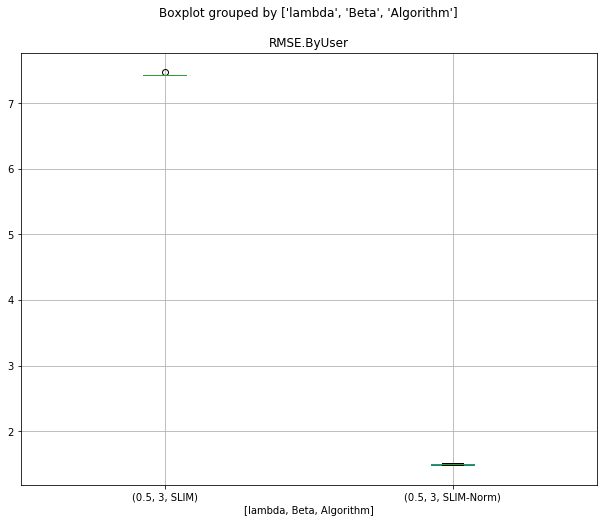

In [8]:
res_slim.boxplot(['RMSE.ByUser'], ['lambda','Beta','Algorithm'], figsize=(10, 8))

## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

In [9]:
df = results.loc[results['lambda'].notnull(),['lambda', 'RMSE.ByUser']].groupby('lambda').mean()
# df.plot.scatter(x=df['lambda'], y=df['RMSE.ByUser'])

/home/mtian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.5, right=0.5
  'left=%s, right=%s') % (left, right))


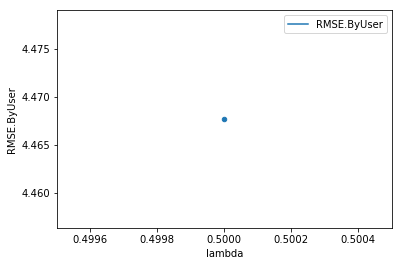

In [10]:
ax = df.reset_index().plot.scatter(y='RMSE.ByUser', x='lambda')
df.plot(ax=ax)

Next up: nDCG

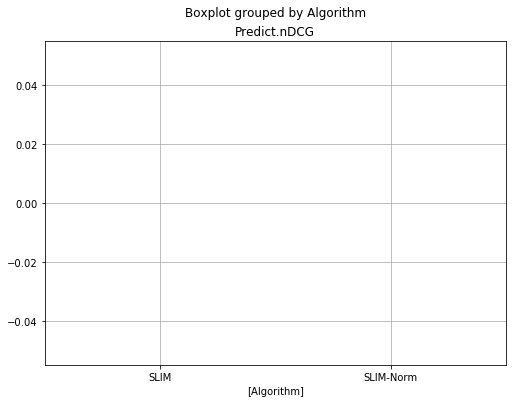

In [11]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7355b0dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc731f45e48>], dtype=object)

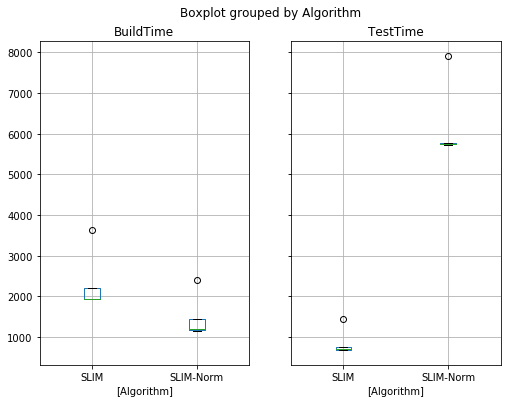

In [12]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

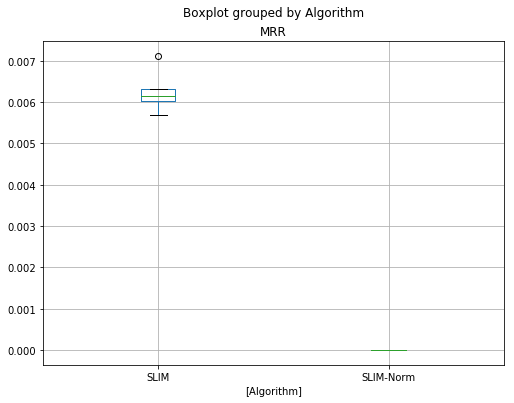

In [13]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

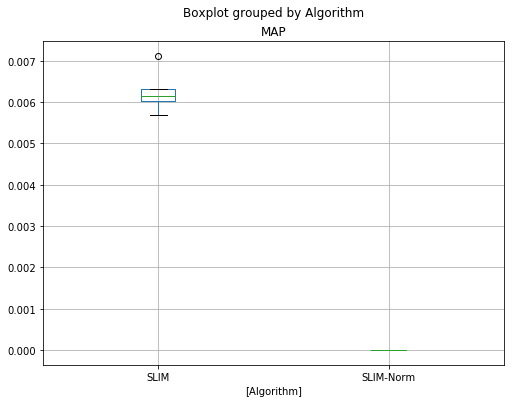

In [14]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

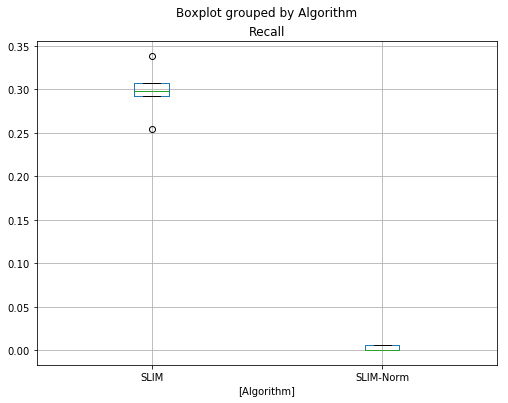

In [14]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

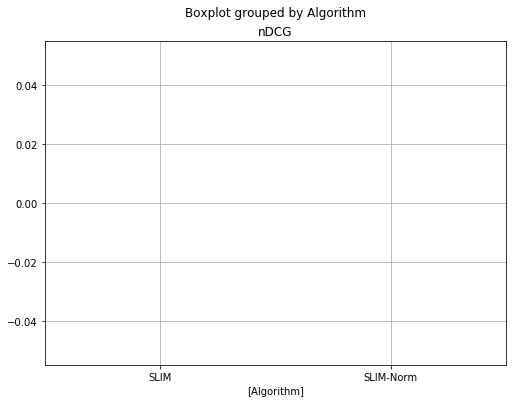

In [15]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))